In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import shap
from sklearn.inspection import permutation_importance
import plotly.express as px

In [ ]:
url = 'https://bit.ly/adv_bi_bank_cust_churn '
df = pd.read_csv(url)

In [ ]:
def inspect_data(df, col=None, n=5):
    print(f'data shape: {df.shape}')
    if col is None :
        col = df.columns
    display(df[col].head(n))
def check_missing(df, cut_off=0, sort=True):
    freq=df.isnull().sum()
    percent=df.isnull().sum()/df.shape[0]*100
    types=df.dtypes
    unique = df.apply(pd.unique).to_frame(name='Unique Values')['Unique Values']
    df_miss=pd.DataFrame({'missing_percentage':percent, 'missing_frequency':freq, 'types':types, 'unique_values':unique})
    if sort: df_miss.sort_values(by='missing_frequency',ascending= False, inplace=True)
    return display(df_miss[df_miss['missing_percentage'] >= cut_off])

In [ ]:
inspect_data(df)

data shape: (10127, 21)


,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
check_missing(df)

,missing_percentage,missing_frequency,types,unique_values
user_id,0.0,0,int64,"[768805383, 818770008, 713982108, 769911858, 7..."
months_inactive_12_mon,0.0,0,int64,"[1, 4, 2, 3, 6, 0, 5]"
total_ct_chng_q4_q1,0.0,0,float64,"[1.625, 3.714, 2.333, 2.5, 0.846, 0.722, 0.714..."
total_trans_ct,0.0,0,int64,"[42, 33, 20, 28, 24, 31, 36, 32, 26, 17, 29, 2..."
total_trans_amt,0.0,0,int64,"[1144, 1291, 1887, 1171, 816, 1088, 1330, 1538..."
total_amt_chng_q4_q1,0.0,0,float64,"[1.335, 1.541, 2.594, 1.405, 2.175, 1.376, 1.9..."
avg_open_to_buy,0.0,0,float64,"[11914.0, 7392.0, 3418.0, 796.0, 4716.0, 2763...."
total_revolving_bal,0.0,0,int64,"[777, 864, 0, 2517, 1247, 2264, 1396, 1677, 14..."
credit_limit,0.0,0,float64,"[12691.0, 8256.0, 3418.0, 3313.0, 4716.0, 4010..."
contacts_count_12_mon,0.0,0,int64,"[3, 2, 0, 1, 4, 5, 6]"


# Nomor 1

## a.

In [ ]:
hist = go.Figure(data=[go.Histogram(x=df['customer_age'])])
hist.update_layout(
    title_text='Age Distribution',
    xaxis_title_text='Age',
    yaxis_title_text='Frequency',
    bargap=0.05,
    bargroupgap=0.1)
hist.show()

In [ ]:
df[['user_id', 'total_amt_chng_q4_q1', 'attrition_flag']].sort_values(by='total_amt_chng_q4_q1')

,user_id,total_amt_chng_q4_q1,attrition_flag
7998,716315508,0.000,Attrited Customer
4417,708084558,0.000,Attrited Customer
4701,824140908,0.000,Attrited Customer
7207,815539233,0.000,Attrited Customer
3596,827117808,0.000,Attrited Customer
...,...,...,...
219,803043933,2.368,Existing Customer
2,713982108,2.594,Existing Customer
773,713989233,2.675,Existing Customer
8,710930508,3.355,Existing Customer


In [ ]:
churn_by_trs = df.groupby(pd.cut(df['total_amt_chng_q4_q1'], bins=np.arange(0, 3000, 500)))['attrition_flag'].value_counts(normalize=True).unstack()
churn_by_trs.sort_values(by='Attrited Customer', ascending=False)

attrition_flag,Attrited Customer,Existing Customer
total_amt_chng_q4_q1,,
"(0, 500]",0.160245,0.839755
"(500, 1000]",0.000000,0.000000
"(1000, 1500]",0.000000,0.000000
"(1500, 2000]",0.000000,0.000000
"(2000, 2500]",0.000000,0.000000


In [ ]:
churn_by_age = df.groupby(pd.cut(df['customer_age'], bins=np.arange(10, 90, 10)))['attrition_flag'].value_counts(normalize=True).unstack()
churn_by_age.sort_values(by='Attrited Customer', ascending=False)

attrition_flag,Attrited Customer,Existing Customer
customer_age,,
"(50, 60]",0.167602,0.832398
"(40, 50]",0.167455,0.832545
"(30, 40]",0.145403,0.854597
"(60, 70]",0.143564,0.856436
"(20, 30]",0.120755,0.879245
"(10, 20]",0.000000,0.000000
"(70, 80]",0.000000,1.000000


Distribusi umur pelanggan pada dataset ini merupakan distribusi normal yang didominasi oleh umur 40-55 tahun.
Pada kasus ini pelanggan pada rentang usia 40-50 dan 50-60 tahun memiliki persentsase churn yang paling besar yaitu 16,74% dan 16,76%.

## b.

In [ ]:
edu_label = {'Unknown' : 1,
             'Uneducated' : 2,
             'High School': 3,
             'College' : 4,
             'Graduate' : 5,
             'Post-Graduate' : 6,
             'Doctorate' : 7}
income_label = {'Unknown' : 1,
                'Less than $40K' : 2,
                '$40K - $60K' : 3,
                '$60K - $80K' : 4,
                '$80K - $120K' : 5,
                '$120K +' : 6}

In [ ]:
df['edu_class'] = df['education_level'].map(edu_label)
df['income_class'] = df['income_category'].map(income_label)

In [ ]:
reg = go.Figure()
reg.add_trace(go.Scatter(x=df['edu_class'], y=df['income_class'], mode='markers', name='Data'))
reg.add_trace(go.Scatter(x=df['edu_class'], y=np.poly1d(np.polyfit(df['edu_class'], df['income_class'], 1))(df['edu_class']), mode='lines', name='Regression'))

reg.update_layout(
    title="Regression Plot",
    xaxis_title="Education",
    yaxis_title="Income",
    showlegend=True,
)

reg.show()

In [ ]:
correlation_edu_income = df[['edu_class', 'income_class']].corr(method='pearson')
correlation_edu_income

,edu_class,income_class
edu_class,1.000000,-0.011677
income_class,-0.011677,1.000000


In [ ]:
df_cros_edu = pd.crosstab(df['edu_class'], df['attrition_flag']).reset_index()
df_cros_income = pd.crosstab(df['income_class'], df['attrition_flag']).reset_index()
display(df_cros_edu)
display(df_cros_income)

attrition_flag,edu_class,Attrited Customer,Existing Customer
0,1,256,1263
1,2,237,1250
2,3,306,1707
3,4,154,859
4,5,487,2641
5,6,92,424
6,7,95,356


attrition_flag,income_class,Attrited Customer,Existing Customer
0,1,187,925
1,2,612,2949
2,3,271,1519
3,4,189,1213
4,5,242,1293
5,6,126,601


In [ ]:
reg = go.Figure()
reg.add_trace(go.Scatter(x=df_cros_edu['edu_class'], y=df_cros_edu['Attrited Customer'], mode='markers', name='Data'))
reg.add_trace(go.Scatter(x=df_cros_edu['edu_class'], y=np.poly1d(np.polyfit(df_cros_edu['edu_class'], df_cros_edu['Attrited Customer'], 1))(df_cros_edu['edu_class']), mode='lines', name='Regression'))

reg.update_layout(
    title="Regression Plot Education VS Churn",
    xaxis_title="Education",
    yaxis_title="Churn",
    showlegend=True,
)

reg.show()

In [ ]:
correlation_edu_churn = df_cros_edu[['edu_class', 'Attrited Customer']].corr(method='pearson')
correlation_edu_churn

attrition_flag,edu_class,Attrited Customer
attrition_flag,,
edu_class,1.000000,-0.329117
Attrited Customer,-0.329117,1.000000


In [ ]:
reg = go.Figure()
reg.add_trace(go.Scatter(x=df_cros_income['income_class'], y=df_cros_income['Attrited Customer'], mode='markers', name='Data'))
reg.add_trace(go.Scatter(x=df_cros_income['income_class'], y=np.poly1d(np.polyfit(df_cros_income['income_class'], df_cros_income['Attrited Customer'], 1))(df_cros_income['income_class']), mode='lines', name='Regression'))

reg.update_layout(
    title="Regression Plot Income VS Churn",
    xaxis_title="Income",
    yaxis_title="Churn",
    showlegend=True,
)

reg.show()

In [ ]:
correlation_income_churn = df_cros_income[['income_class', 'Attrited Customer']].corr(method='pearson')
correlation_income_churn

attrition_flag,income_class,Attrited Customer
attrition_flag,,
income_class,1.000000,-0.459045
Attrited Customer,-0.459045,1.000000


Tidak ada korelasi antara tingkat pendidikan dengan tingkat pendapatan yang dibuktikan dengan nilai korelasi (pearson) sebesar -0,011677.
Korelasi antara tingkat pendidikan dengan churn sebesar -0,329117, sedangkan Korelasi antara tingkat pendidikan dengan churn sebesar -0,459045. Kedua prediktor tersebut memiliki korelasi yang kurang dri 0,5 atau -0,5 yang berarti hubungan dengan churn tidak signifikan.


## c.

In [ ]:
churn_by_gender = df.groupby('gender')['attrition_flag'].value_counts(normalize=True).unstack()
churn_by_gender

attrition_flag,Attrited Customer,Existing Customer
gender,,
F,0.173572,0.826428
M,0.146152,0.853848


Tidak terdapat perbedaan yang signifikan untuk nilai persentase churn berdasarkan gender karena persentase churn pada gender MALE sebesar 14,6% dan untuk FEMALE 17,3%.

## d.

In [ ]:
churn_by_periode = df.groupby(pd.cut(df['months_on_book'], bins=np.arange(10, 60,5)))['attrition_flag'].value_counts(normalize=True).unstack()
churn_by_periode = churn_by_periode.sort_values(by='Attrited Customer', ascending=False).reset_index()
churn_by_periode['months_on_book'] = churn_by_periode['months_on_book'].astype(str)

In [ ]:
periode_dict = {'(10, 15]' : 1,
                '(15, 20]' : 2,
                '(20, 25]' : 3,
                '(25, 30]' : 4,
                '(30, 35]' : 5,
                '(35, 40]' : 6,
                '(40, 45]' : 7,
                '(45, 50]' : 8,
                '(50, 55]' : 9
                }

In [ ]:
churn_by_periode['periode_class'] = churn_by_periode['months_on_book'].map(periode_dict)

In [ ]:
bar = go.Figure()

bar.add_trace(go.Bar(x=churn_by_periode['months_on_book'], y=[val * 100 for val in churn_by_periode['Attrited Customer']], name='Attrited Customer', marker_color='darkblue'))

bar.update_layout(
    title="Months on Book vs Attrited Customer",
    xaxis_title="Months on Book",
    yaxis_title="Percentage",
)

bar.show()

Berdasarkan bar plot di atas kategori periode pelanggan menggunakan produk dengan churn tertinggi adalah pada periode 45-50 bulan. Tingkat churn menurun berdasarkan lamanya periode pelanggan menggunakan produk.

In [ ]:
correlation_month_churn = churn_by_periode[['periode_class', 'Attrited Customer']].corr(method='pearson')
correlation_month_churn

attrition_flag,periode_class,Attrited Customer
attrition_flag,,
periode_class,1.000000,0.377401
Attrited Customer,0.377401,1.000000


In [ ]:
X = churn_by_periode['periode_class']
y = churn_by_periode['Attrited Customer']

X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.270144
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      Attrited Customer   No. Observations:                    9
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 May 2024   Pseudo R-squ.:                     inf
Time:                        14:26:50   Log-Likelihood:                -2.4313
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.7645      2.028     -0.870      0.384      -5.740       2.211
periode_class     0.

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:4469: RuntimeWarning:

divide by zero encountered in scalar divide



In [ ]:
def probability(x):
    log_odds = b0 + b1 * x
    return 1 / (1 + np.exp(-log_odds))

b0 = -1.7645
b1 = 0.0135

list_probability = []
for i in range(1,100) :
  prob = probability(i)
  list_probability.append(prob)


In [ ]:
fig = go.Figure(data=go.Scatter(x=list(range(1,100)), y=list_probability , mode='lines+markers', name='Churn Probability'))

fig.update_layout(
    title="Churn Probability Over Month Periode",
    xaxis_title="Months",
    yaxis_title="Churn Probability",
    showlegend=True
)

fig.show()

Korelasi antara periode menjadi pelanggan dengan tingkat churn sebesar 0,377. Semakin lama periode menjadi pelanggan maka probabilitas churn juga semakin meningkat.

contacts_count_12_mon

## e.

In [ ]:
churn_by_interraction = df.groupby('contacts_count_12_mon')['attrition_flag'].value_counts(normalize=True).unstack()
churn_by_interraction = churn_by_interraction.sort_values(by='Attrited Customer', ascending=False).reset_index()

In [ ]:
fig = go.Figure(data=go.Scatter(x=churn_by_interraction['contacts_count_12_mon'], y=churn_by_interraction['Attrited Customer'], mode='lines+markers', name='Attrited Customer'))

fig.update_layout(
    title="Attrited Customer by Contacts Count",
    xaxis_title="Contacts Count",
    yaxis_title="Attrited Customer",
    showlegend=True
)

fig.show()

In [ ]:
correlation_interraction_churn = churn_by_interraction[['contacts_count_12_mon', 'Attrited Customer']].corr(method='pearson')
correlation_interraction_churn

attrition_flag,contacts_count_12_mon,Attrited Customer
attrition_flag,,
contacts_count_12_mon,1.000000,0.827497
Attrited Customer,0.827497,1.000000


In [ ]:
X = churn_by_interraction['contacts_count_12_mon']
y = churn_by_interraction['Attrited Customer']

X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.299531
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      Attrited Customer   No. Observations:                    7
Model:                          Logit   Df Residuals:                        5
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 May 2024   Pseudo R-squ.:                  0.4160
Time:                        14:26:50   Log-Likelihood:                -2.0967
converged:                       True   LL-Null:                       -3.5905
Covariance Type:            nonrobust   LLR p-value:                   0.08391
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.2531      3.208     -1.326      0.185     -10.541       2.

In [ ]:
b0 = -4.2531
b1 = 0.9034

list_probability = []
for i in range(1,13) :
  prob = probability(i)
  list_probability.append(prob)

In [ ]:
fig = go.Figure(data=go.Scatter(x=list(range(1,13)), y=list_probability , mode='lines+markers', name='Churn Probability'))

fig.update_layout(
    title="Churn Probability Over Month Interaction",
    xaxis_title="Months",
    yaxis_title="Churn Probability",
    showlegend=True
)

fig.show()

Korelasi antara banyaknya interaksi nasabah dengan bank dengan tingkat churn sebesar 0,827 dimana nilai ini cukup tinggi. Semakin sering pelanggan berinteraksi dengan bank maka probabilitas churnnya juga semakin tinggi dengan membentuk pola logaritmik.

# Nomor 2

In [ ]:
card_dict = {'Blue' : 1,
             'Silver' : 2,
             'Gold' : 3,
             'Platinum' : 4}
attr_dict = {'Attrited Customer' : 1,
             'Existing Customer' : 0}

In [ ]:
df['card_class'] = df['card_category'].map(card_dict)
df['attr_class'] = df['attrition_flag'].map(attr_dict)

In [ ]:
df_model = df.drop(columns=['user_id','education_level', 'income_category', 'card_category','attrition_flag'])

In [ ]:
label_encoder = LabelEncoder()

for column in ['marital_status','gender']:
    if df_model[column].dtype == 'object':
        encoded_data = label_encoder.fit_transform(df_model[column])
        df_model[column] = encoded_data
        print(f"Column: {column}")
        print(f"Encoded Values: {label_encoder.classes_}")

Column: marital_status
Encoded Values: ['Divorced' 'Married' 'Single' 'Unknown']
Column: gender
Encoded Values: ['F' 'M']


In [ ]:
df_model

,customer_age,gender,dependent_count,marital_status,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,edu_class,income_class,card_class,attr_class
0,45,1,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,3,4,1,0
1,49,0,5,2,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,5,2,1,0
2,51,1,3,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,5,5,1,0
3,40,0,4,3,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,3,2,1,0
4,40,1,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,5,3,1,0
10123,41,1,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,3,1,1
10124,44,0,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,3,2,1,1
10125,30,1,2,3,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,5,3,1,1


In [ ]:
x = df_model.drop(columns=['attr_class'])
y = df_model['attr_class']

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.columns= x.columns
x_scaled.head()

,customer_age,gender,dependent_count,marital_status,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,edu_class,income_class,card_class
0,-0.165406,1.059956,0.503368,-0.628128,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,-0.354022,0.620039,-0.250587
1,0.333570,-0.943436,2.043199,0.727306,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,0.822218,-0.736292,-0.250587
2,0.583058,1.059956,0.503368,-0.628128,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,0.822218,1.298204,-0.250587
3,-0.789126,-0.943436,1.273283,2.082739,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.354022,-0.736292,-0.250587
4,-0.789126,1.059956,0.503368,-0.628128,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-0.942142,0.620039,-0.250587


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=42)

print("Training set - X shape:", x_train.shape)
print("Testing set - X shape:", x_test.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (8101, 19)
Testing set - X shape: (2026, 19)
Training set - y shape: (8101,)
Testing set - y shape: (2026,)


In [ ]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)
pca_best_components = pd.DataFrame(pca.components_, columns=x_train.columns).T
pca_best_components['mean_weight'] = pca_best_components.iloc[:].abs().mean(axis=1)

In [ ]:
n_components = (pca.explained_variance_ratio_.cumsum() <= 0.8).sum()
x_pca_selected = x_pca[:, :n_components]

In [ ]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.20, random_state=42)
print("Training set - X shape:", x_train_pca.shape)
print("Testing set - X shape:", x_test_pca.shape)
print("Training set - y shape:", y_train_pca.shape)
print("Testing set - y shape:", y_test_pca.shape)

Training set - X shape: (8101, 19)
Testing set - X shape: (2026, 19)
Training set - y shape: (8101,)
Testing set - y shape: (2026,)


In [ ]:
models = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print('without PCA')
for model in models:
    scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)

    print(type(model).__name__)
    print(f"  Cross-Validation Mean Accuracy: {scores.mean()}")
    print(f"  Train Accuracy: {train_score}")
    print(f"  Test Accuracy: {test_score}")
    print()

print('with PCA')
for model_pca in models:
    scores_pca = cross_val_score(model_pca, x_train_pca, y_train_pca, cv=kfold, scoring='accuracy')

    model_pca.fit(x_train_pca, y_train_pca)
    train_score_pca = model_pca.score(x_train_pca, y_train_pca)
    test_score_pca = model_pca.score(x_test_pca, y_test_pca)

    print(type(model_pca).__name__)
    print(f"  Cross-Validation Mean Accuracy: {scores_pca.mean()}")
    print(f"  Train Accuracy: {train_score_pca}")
    print(f"  Test Accuracy: {test_score_pca}")
    print()

without PCA
LogisticRegression
  Cross-Validation Mean Accuracy: 0.9033443766612592
  Train Accuracy: 0.9045796815207999
  Test Accuracy: 0.9022704837117473

KNeighborsClassifier
  Cross-Validation Mean Accuracy: 0.9081586583498982
  Train Accuracy: 0.9348228613751389
  Test Accuracy: 0.8998025666337611

AdaBoostClassifier
  Cross-Validation Mean Accuracy: 0.9567953785576652
  Train Accuracy: 0.9646957165782002
  Test Accuracy: 0.9506416584402764

RandomForestClassifier
  Cross-Validation Mean Accuracy: 0.9606220059253167
  Train Accuracy: 1.0
  Test Accuracy: 0.9605133267522211

XGBClassifier
  Cross-Validation Mean Accuracy: 0.9721019641891532
  Train Accuracy: 1.0
  Test Accuracy: 0.9649555774925962

with PCA
LogisticRegression
  Cross-Validation Mean Accuracy: 0.9033443766612592
  Train Accuracy: 0.9045796815207999
  Test Accuracy: 0.9022704837117473

KNeighborsClassifier
  Cross-Validation Mean Accuracy: 0.9081586583498982
  Train Accuracy: 0.9348228613751389
  Test Accuracy: 0.89

(XGBClassifier)
  Cross-Validation Mean Accuracy: 0.9721019641891532
  Train Accuracy: 1.0
  Test Accuracy: 0.9649555774925962

  berdasarkan nilai akurasi tersebut maka model dengan algoritma XGBClassifier dan tanpa PCA menjadi model yang terbaik untuk kasus ini.

# Nomor 3

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

In [ ]:
# Metrik-metrik evaluasi model
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')
roc_auc = roc_auc_score(y_test, y_predict, multi_class='ovr', average='weighted')


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
scores = [accuracy, precision, recall, f1, roc_auc]

fig = go.Figure()

fig.add_trace(go.Bar(x=metrics, y=scores, name="Model Metrics"))
fig.update_layout(title='Perbandingan Metrik Evaluasi Model',
                  xaxis_title='Metrik',
                  yaxis_title='Skor',
                  yaxis=dict(range=[0, 1]),
                  template='plotly_white')
fig.show()

Model yang telah dibuat cukup baik dalam memprediksi churn yang dapat dilihat dari score setiap metrik di atas 90%.

# Nomor 4

In [ ]:
results = permutation_importance(model, x_train, y_train, n_repeats=10, random_state=42)

importance = results.importances_mean
feature_names = x_train.columns
feature_importance = list(zip(feature_names, importance))
feature_importance.sort(key=lambda x: x[1], reverse=True)

feature_names, importance = zip(*feature_importance)

fig = go.Figure(go.Bar(
    x=importance,
    y=feature_names,
    orientation='h'
))

fig.update_layout(
    title="Permutation Feature Importance",
    xaxis_title="Importance",
    yaxis_title="Features"
)

fig.show()

top_features = [x[0] for x in feature_importance[:3]]

def partial_dependence(model, X, feature, feature_values):
    y_values = []
    for value in feature_values:
        X_temp = X.copy()
        X_temp[feature] = value
        y_values.append(np.mean(model.predict_proba(X_temp)[:, 1]))
    return y_values

for feature in top_features:
    feature_values = np.linspace(np.percentile(x_train[feature], 1), np.percentile(x_train[feature], 99), 100)
    pdp_values = partial_dependence(model, x_train, feature, feature_values)

    fig = go.Figure(go.Scatter(
        x=feature_values,
        y=pdp_values,
        mode='lines',
        name=feature
    ))

    fig.update_layout(
        title=f"Partial Dependence Plot for {feature}",
        xaxis_title=feature,
        yaxis_title="Partial Dependence",
        showlegend=True
    )

    fig.show()

Fitur yang berpengaruh:

Total_trans_ct : semakin banyak transaksi yang terjadi maka semakin rendah kemungkinan resiko churnnya.
Total_trans_amt : Pengeluaran yang tinggi dapat meningkatkan resiko churn.
Total_amt_chng_q4_q1:  Dengan meningkatnya transaksi diantara q4 dan q1 dapat menurunkan resiko churn


 98%|===================| 7964/8101 [00:20<00:00]       

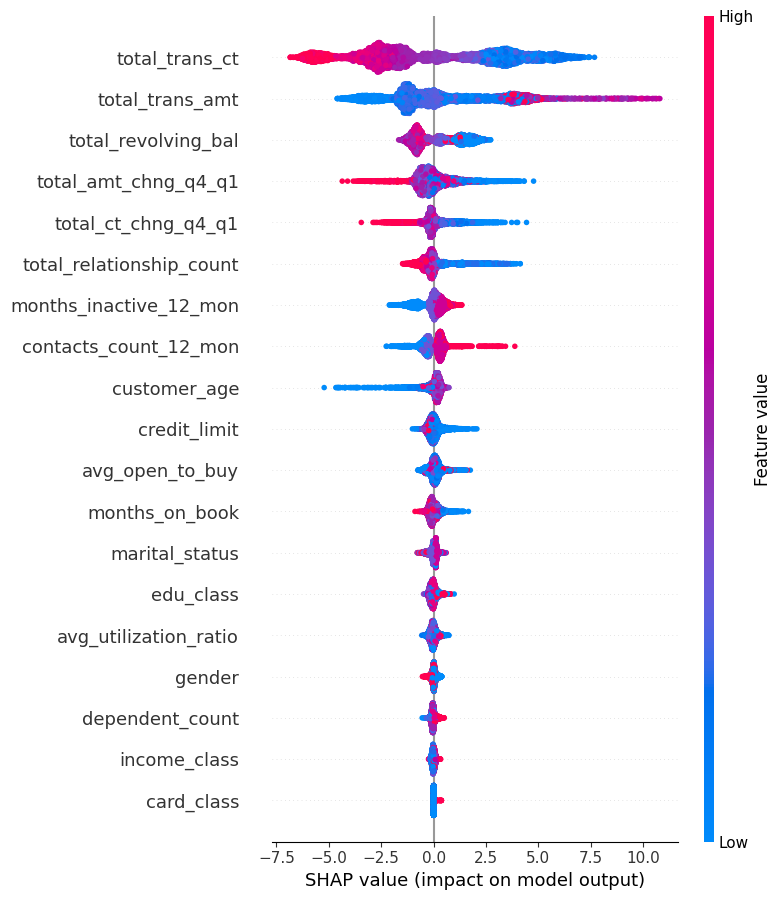

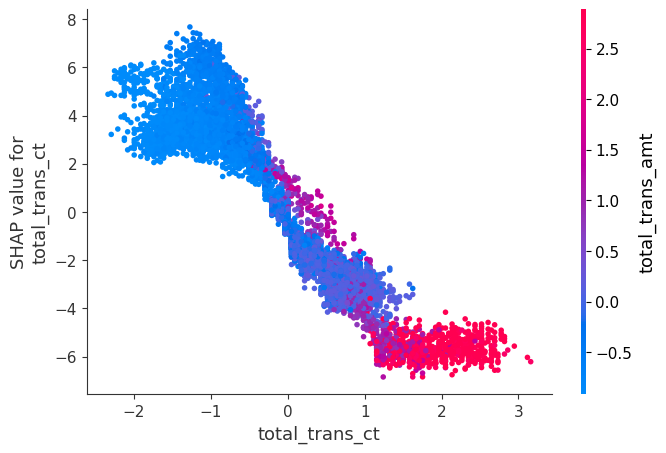

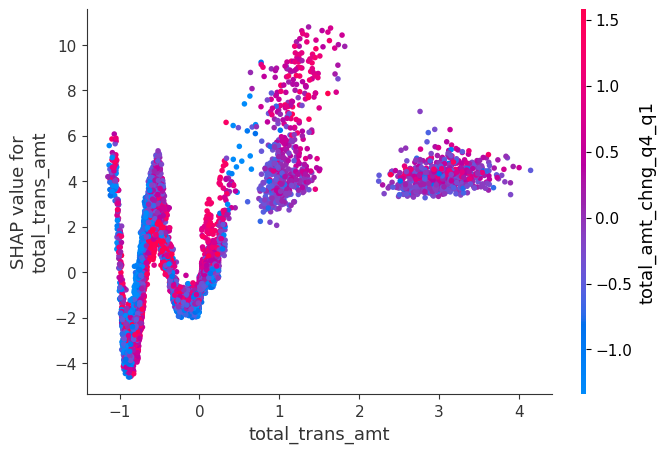

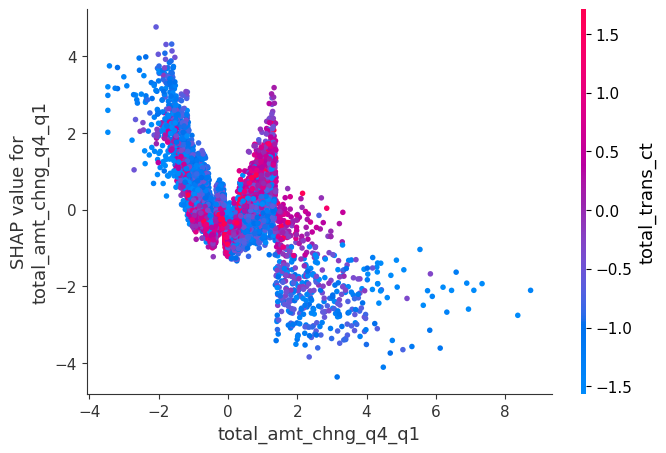

In [ ]:
explainer = shap.Explainer(model, x_train)
shap_values = explainer.shap_values(x_train)

# shap.summary_plot(shap_values, x_train, plot_type="bar", show=False)
shap.summary_plot(shap_values, x_train, feature_names=x_train.columns)

feature_names = x_train.columns
shap_importance = np.abs(shap_values).mean(axis=0)
sorted_idx = np.argsort(shap_importance)

fig = go.Figure(go.Bar(
    x=shap_importance[sorted_idx],
    y=np.array(feature_names)[sorted_idx],
    orientation='h'
))

fig.update_layout(
    title="Shapley Additive Value Feature Importance",
    xaxis_title="Importance",
    yaxis_title="Features"
)

fig.show()

for feature in top_features:
    shap.dependence_plot(feature, shap_values, x_train, show=False)

for feature in top_features:
    fig = px.scatter(
        x=x_train[feature],
        y=shap_values[:, x_train.columns.get_loc(feature)],
        labels={"x": feature, "y": "SHAP Value"},
        title=f'Shapley Dependence Plot for {feature}'
    )
    fig.show()

Fitur yang berpotensi meningkatkan risiko:

Total_trans_ct (SHP negatif besar): Jumlah transaksi yang rendah mungkin menunjukkan peningkatan risiko untuk churn.
Total_trans_amt (SHP positif besar): Pengeluaran yang tinggi dapat mengindikasikan potensi tekanan finansial.
Total_revolving_bal (SHP negatif besar): Saldo kredit bergulir yang kecil mungkin menimbulkan kekhawatiran risiko churn.

Rekomendasi:

Fokuskan upaya pemasaran pada perolehan pelanggan dengan volume transaksi dan pengeluaran tinggi.
Melakukan campaign agar nasabah melakukan banyak transaksi.
Pantau saldo kredit bergulir dengan cermat untuk pelanggan dengan saldo tinggi.
Pertimbangkan untuk menyertakan fitur tambahan terkait stabilitas keuangan atau riwayat pembayaran jika usia pelanggan, batas kredit, dan kredit terbuka untuk dibeli terbukti kurang relevan.